In [ ]:
from sklearn.datasets import load_iris, make_gaussian_quantiles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB


plt.style.use('ggplot')

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"]):
    plt.figure(figsize=(4, 4), dpi=100)
    sns.set_style("whitegrid")
    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm, index=labels,
                         columns=["Predicted " + labels[0], "Predicted " + labels[1]])
    sns.heatmap(df_cm, annot=True, fmt='g')

    plt.show()

In [ ]:
def value_distribution(df):
    num_rows = len(df)
    for column in df.columns:
        print("Value distribution for column:", column)
        value_counts = df[column].value_counts()
        percentages = (value_counts / num_rows) * 100
        for value, count, percent in zip(value_counts.index, value_counts, percentages):
            print(f"{value}: {count} ({percent:.2f}%)")
        print("\n")

In [ ]:
import pandas as pd

BASE_URL = "/content/"
FILE_NAME = "spam.csv"
RANDOM_SEED = 0

df = pd.read_csv(BASE_URL + FILE_NAME, encoding='ISO-8859-1')

print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
for col in df.columns[1:]:
    df[col] = df[col].astype(str).replace('nan', '')
df['Message'] = df.iloc[:, 1:].apply(lambda x: ''.join(x.dropna()), axis=1)
df.drop(df.columns[1:-1], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

v1         0
Message    0
dtype: int64

In [ ]:
spam_map = {"ham": 0, "spam": 1}
df["v1"] = df["v1"].map(lambda x: spam_map[x])

In [ ]:
df.rename(columns={'v1': 'Spam'}, inplace=True)
df.head()

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df["Message"]
y = df["Spam"]

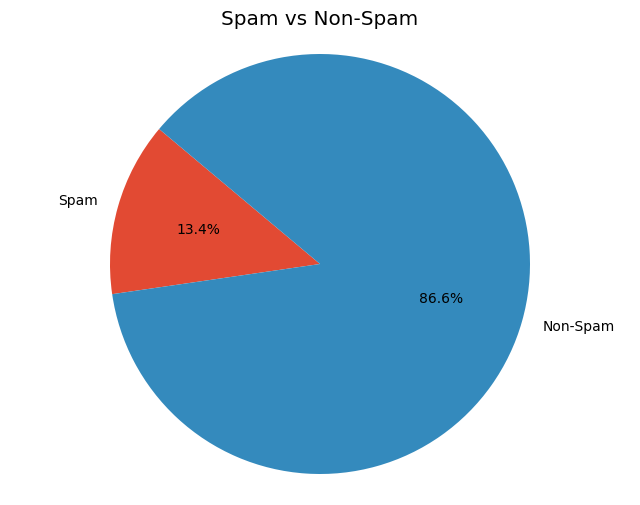

In [ ]:
spam_count = df['Spam'].sum()
non_spam_count = len(df) - spam_count

labels = ['Spam', 'Non-Spam']

sizes = [spam_count, non_spam_count]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Spam vs Non-Spam')
plt.axis('equal')
plt.show()

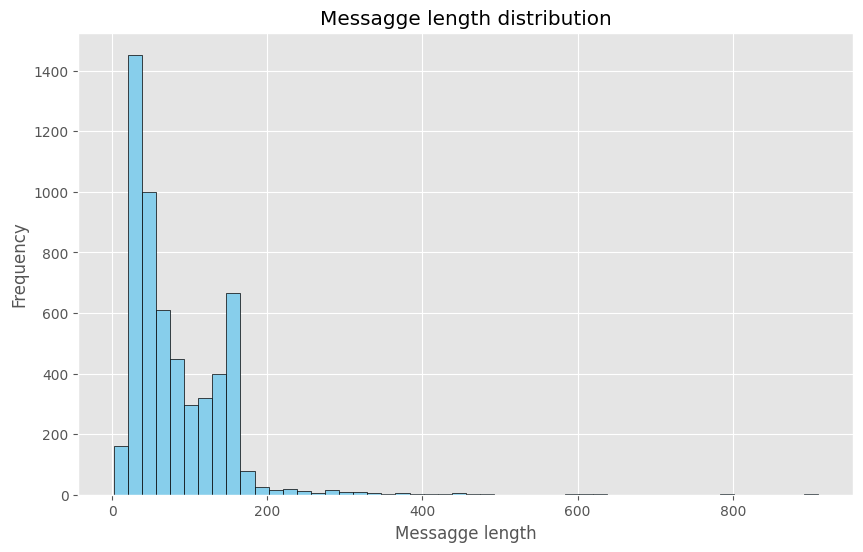

In [ ]:
message_lengths = df['Message'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(message_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Messagge length distribution')
plt.xlabel('Messagge length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

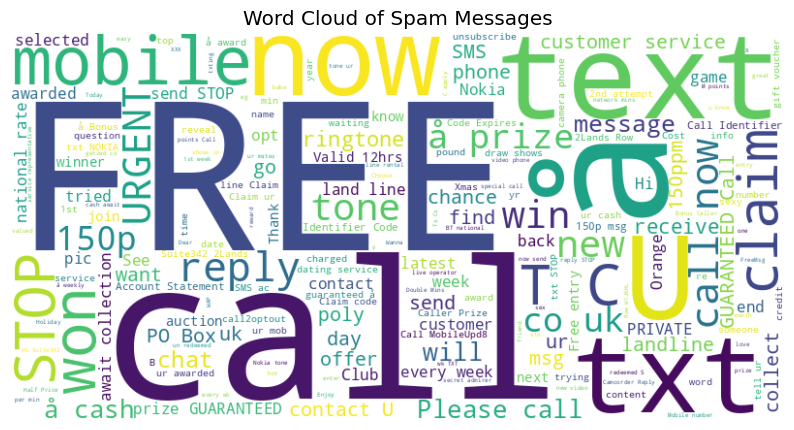

In [ ]:
from wordcloud import WordCloud

spam_messages = ' '.join(df.query('Spam == 1')['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Spam Messages')
plt.axis('off')
plt.show()

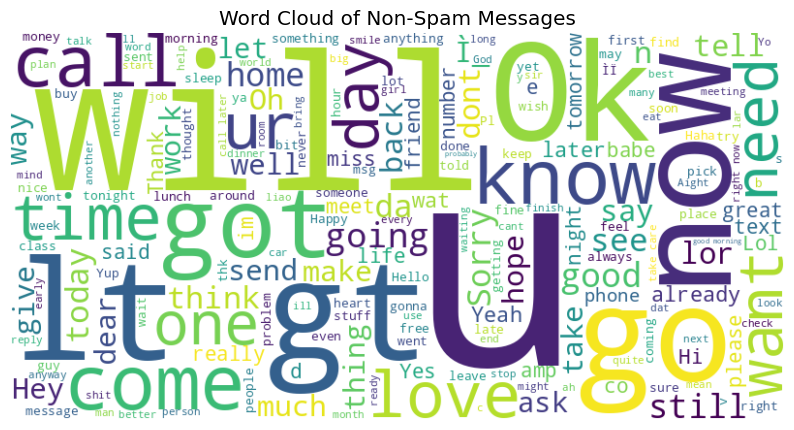

In [ ]:
from wordcloud import WordCloud

spam_messages = ' '.join(df.query('Spam == 0')['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Non-Spam Messages')
plt.axis('off')
plt.show()

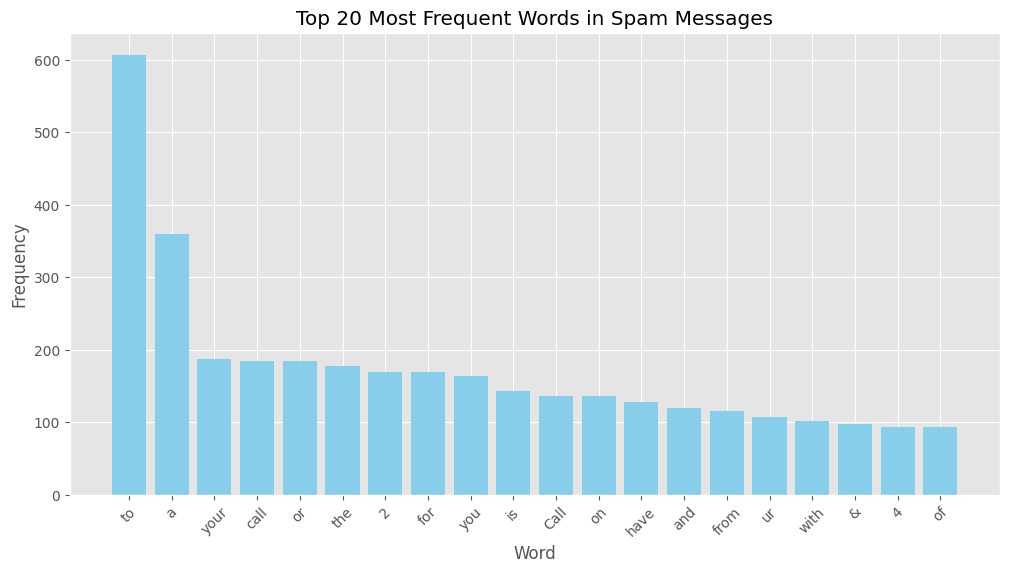

In [ ]:
from collections import Counter

spam_words = ' '.join(df.query('Spam == 1')['Message']).split()

word_counts = Counter(spam_words)

word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'], word_counts_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

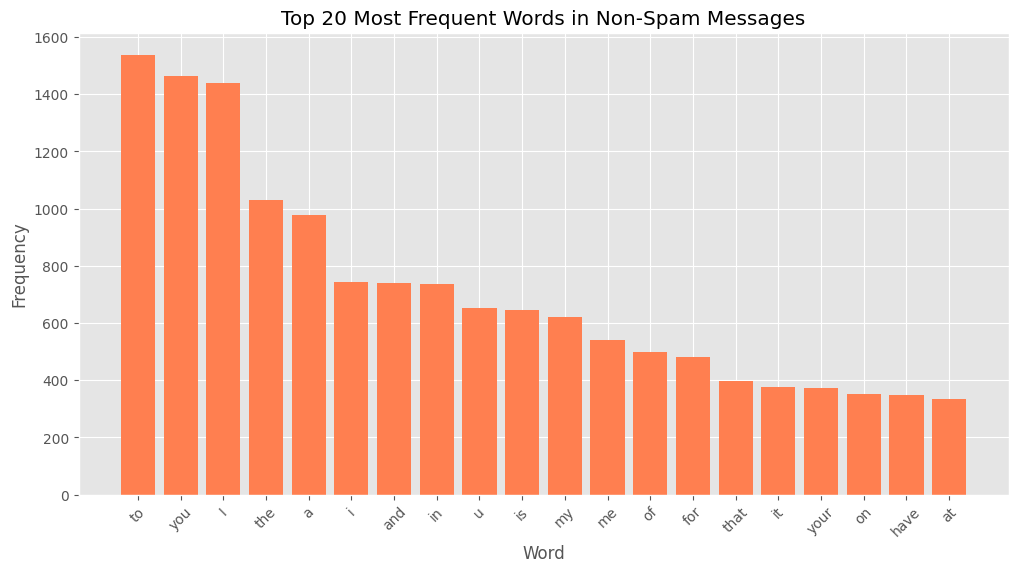

In [ ]:
from collections import Counter

spam_words = ' '.join(df.query('Spam == 0')['Message']).split()

word_counts = Counter(spam_words)

word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'], word_counts_df['Frequency'], color='coral')
plt.title('Top 20 Most Frequent Words in Non-Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english", max_features=50000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(3900, 6899)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1491
           1       0.76      1.00      0.86       181

    accuracy                           0.97      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672



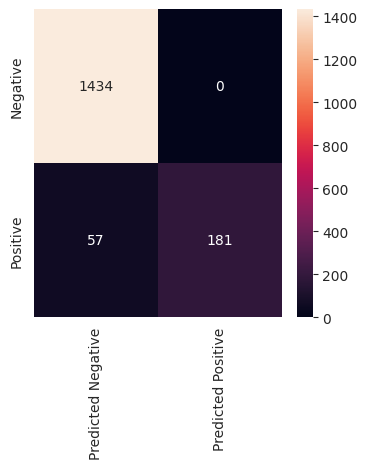

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)
plot_confusion_matrix(y_test, benb.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1471
           1       0.84      1.00      0.92       201

    accuracy                           0.98      1672
   macro avg       0.92      0.99      0.95      1672
weighted avg       0.98      0.98      0.98      1672



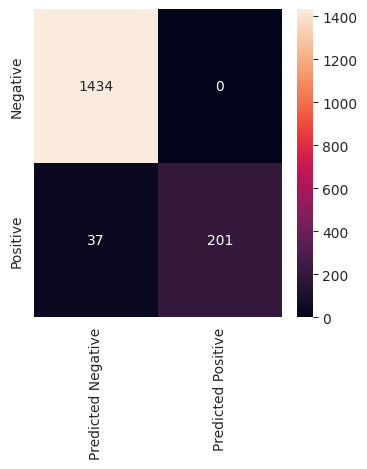

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)
benb = BernoulliNB()
benb.fit(X_resampled_smote, y_resampled_smote)
report = classification_report(benb.predict(X_test), y_test)
print(report)
plot_confusion_matrix(y_test, benb.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1472
           1       0.84      1.00      0.91       200

    accuracy                           0.98      1672
   macro avg       0.92      0.99      0.95      1672
weighted avg       0.98      0.98      0.98      1672



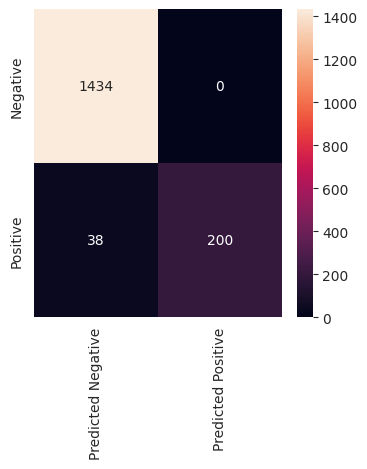

In [ ]:
from imblearn.over_sampling import ADASYN
X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X_train, y_train)
benb = BernoulliNB()
benb.fit(X_resampled_adasyn, y_resampled_adasyn)
report = classification_report(benb.predict(X_test), y_test)
print(report)
plot_confusion_matrix(y_test, benb.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1493
           1       0.75      1.00      0.86       179

    accuracy                           0.96      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.97      0.96      0.97      1672



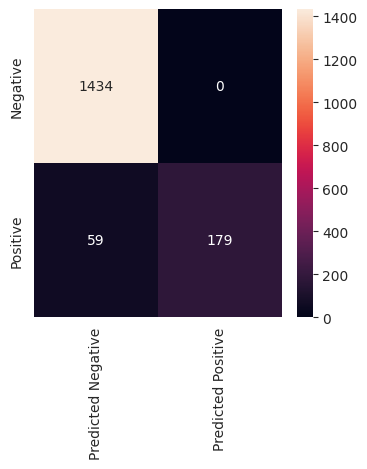

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)
plot_confusion_matrix(y_test, mnb.predict(X_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1401
           1       0.95      0.83      0.88       271

    accuracy                           0.96      1672
   macro avg       0.96      0.91      0.93      1672
weighted avg       0.96      0.96      0.96      1672



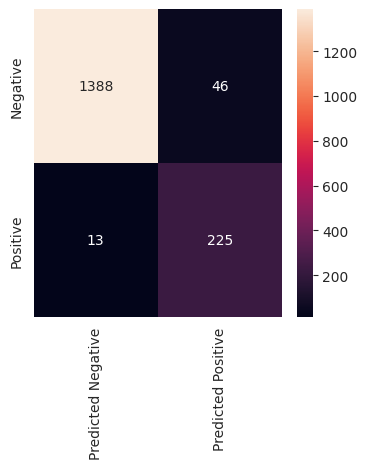

In [ ]:
comnb = ComplementNB()
comnb.fit(X_train, y_train)
report = classification_report(comnb.predict(X_test), y_test)
print(report)
plot_confusion_matrix(y_test, comnb.predict(X_test))